In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r"C:\Users\TECHNOSELLERS\Desktop\Project's_for_Portfolio\Data Anaysis project\EDA_Diabetes_predictor\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "colums")
df.info()
df.describe()

Dataset contains 768 rows and 9 colums
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Replace 0 with NaN
cols_with_invalid_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [19]:
#Check for missing columns
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [20]:
for col in cols_with_invalid_zero:
    df[col] = df[col].fillna(df[col].median())

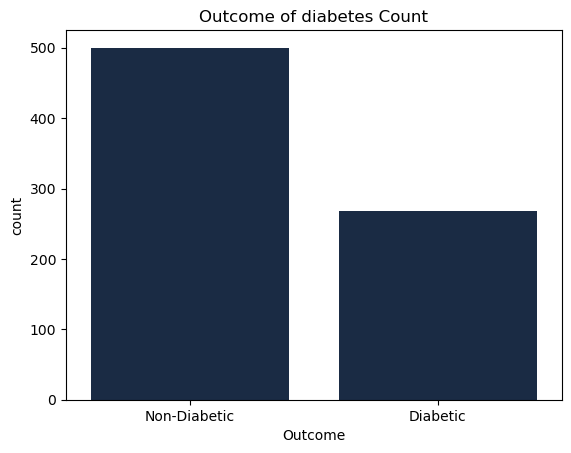

In [46]:
sns.countplot(x='Outcome',data=df, color = '#13294B')
plt.title('Outcome of diabetes Count')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.show()

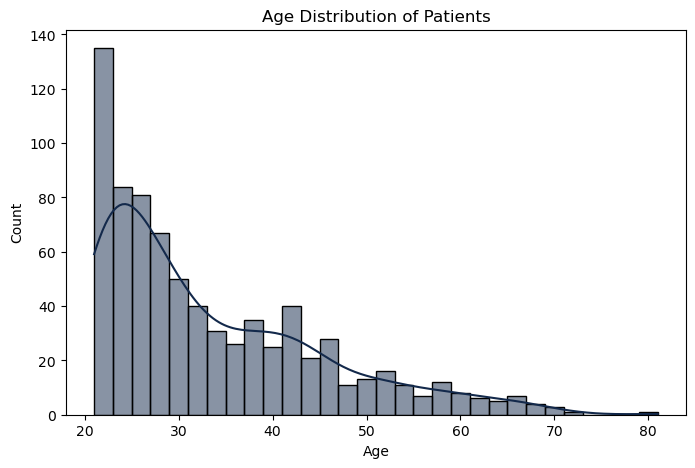

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30,kde=True, color = '#13294B')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.show()

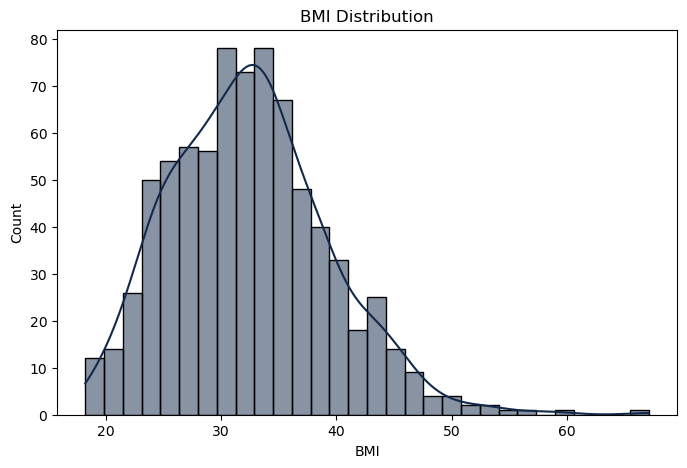

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'],bins=30,kde=True, color = '#13294B')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

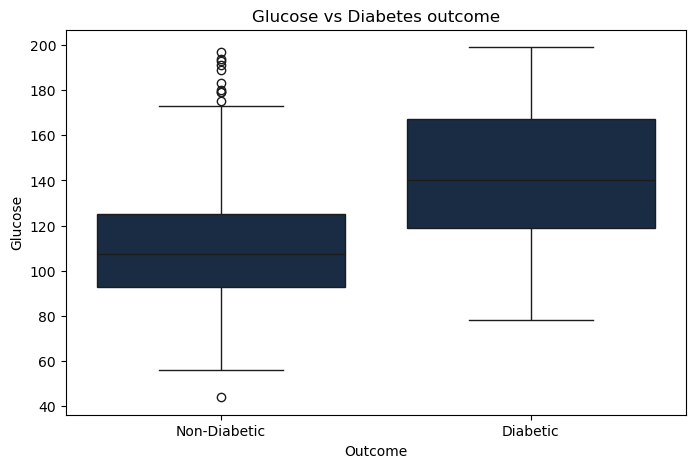

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome',y='Glucose',data=df, color = '#13294B')
plt.title('Glucose vs Diabetes outcome')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.show()

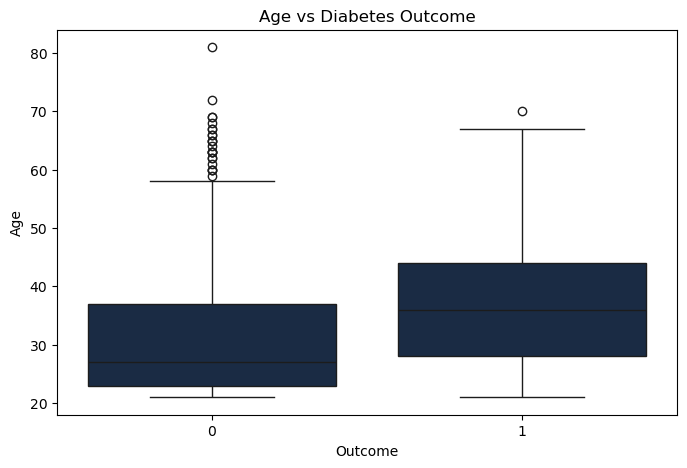

In [55]:
# Age vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df, color = '#13294B')
plt.title("Age vs Diabetes Outcome")
plt.show()

Text(0.5, 1.0, 'Correlation Matix')

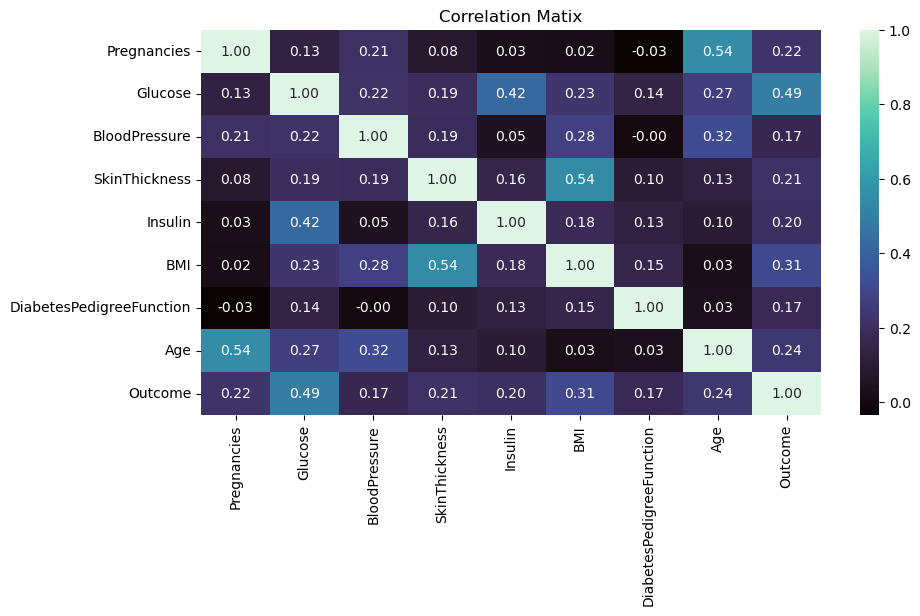

In [41]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Matix')

In [ ]:
Summary of the EDA pipeline:

1) Loaded the dataset and reviewed shape, columns, and dtypes.
2) Replaced invalid zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN.
3) Inspected missingness from the replacement.
4) Imputed median values to fill in missing entries.
5) Checked class balance with an outcome countplot.
6) Visualized distributions (Age, BMI) for spread and skewness.
7) Compared groups using boxplots (Glucose vs Outcome, Age vs Outcome).
8) Computed correlations and plotted a heatmap to see associations with Outcome and possible multicollinearity.